# Polymorphic Uncertainty Quantification for Operational Modal Analysis

### Measurement chain: 

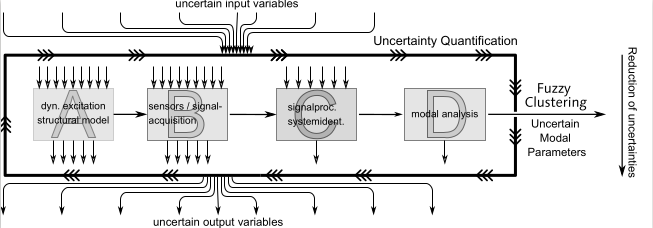


### Scenario / Problem: 

An analyst has been given the task to experimentally identify structural parameters of a (physically existing) guyed mast, with a tuned mass damper. He has been provided with numerical estimates of modal parameters with their polymorphic uncertainties. On the given day, when the measurements will be taken, the structural parameters are therefore fixed (but unknown to the analyst, but for our forward model paramaters will be certain). The mast is assumed time-invariant in the period of the measurement. However, aleatory uncertainties due to the environmental and operational conditions are present in the recorded signals. 

What are the uncertainties of the identified modal paremeters given a single setup measurement using at most xx sensors (xx/2 in each horizontal direction) on the guyed mast example structure? 

### Task:
Based on the given knowledge, the analyst is  tasked to set parameters for measurement and signal acqusition as well as signal processing and system identification. 

### Expected results:
Polymorphically uncertain identified modal parameters of the (certain) structure, e.g. plausibilities of the cumulative probability distribution of the first identified natural frequency. In general the identified modal parameters for a given mode should be very similar, since the structural parameters are not uncertain. In principle errors of numerical vs. identified could be used, but it is preferred to stay "output-only".


### Given knowledge:

    - Modeshapes (Without uncertainties)    
    
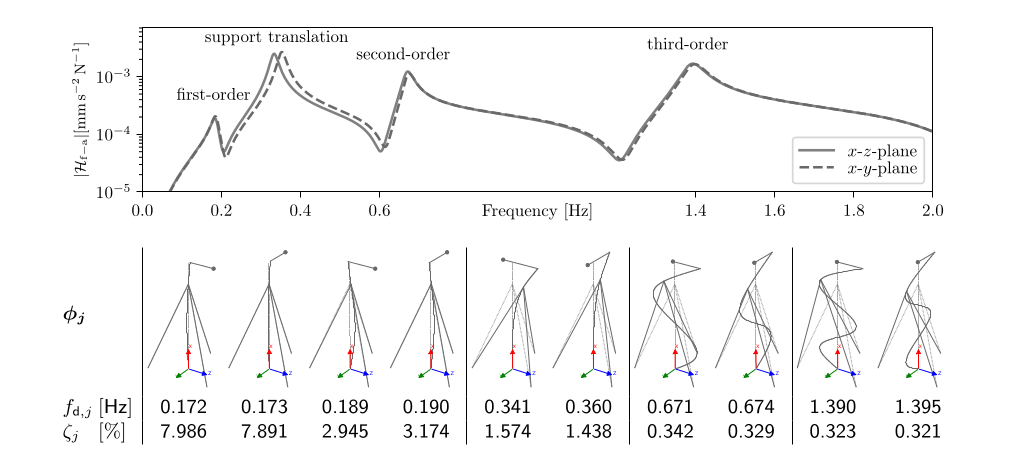

    - Average Natural Frequencies (Plausibility)
    
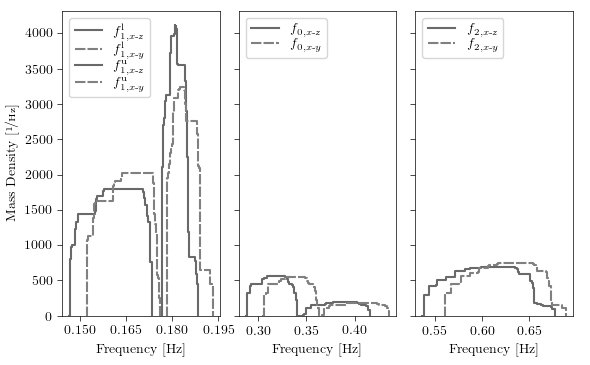
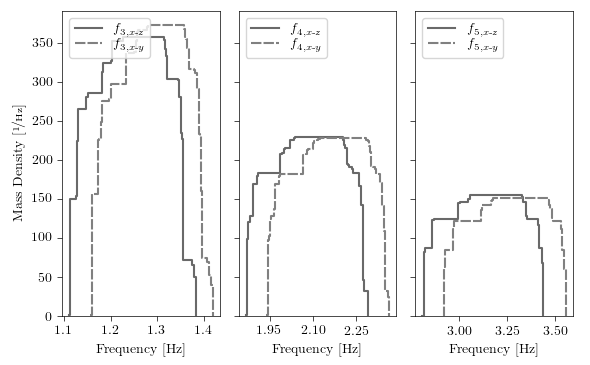

    - Average Damping Ratios (Plausibility)
    
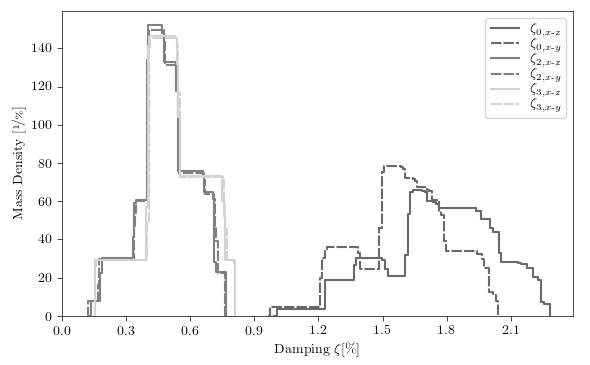
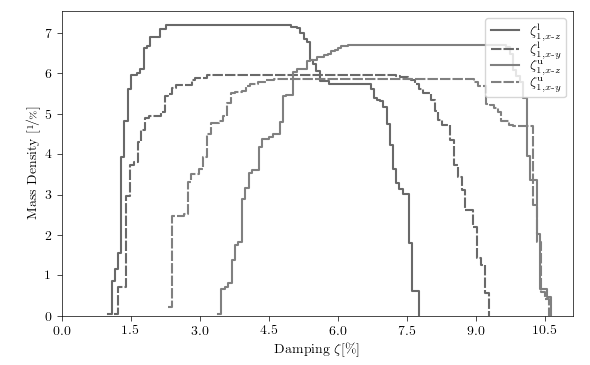

    - Probability Densities of Natural Frequencies, Damping Ratios (Plausibility)
        
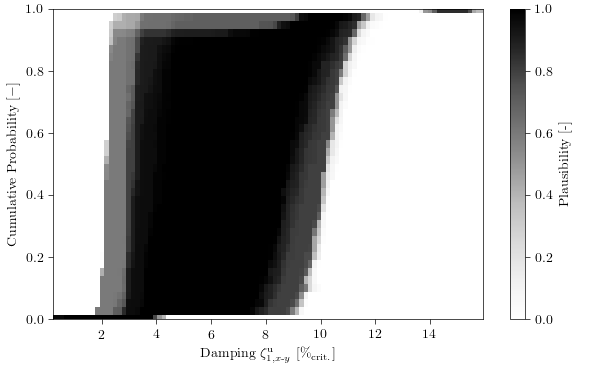
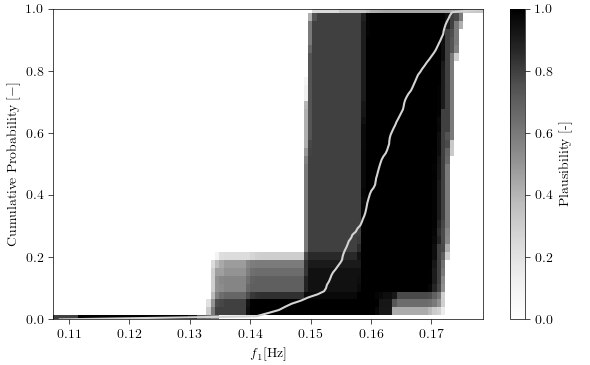

    - Average Accelerance (Plausibility)

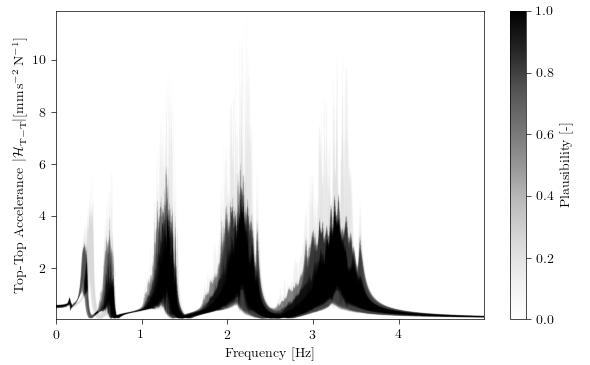

# A: Uncertainty Modeling

## 1. Physical Structure (only aleatory uncertainties in the responses/time series)

The cross-section of the mast is changed from a pipe to a rectangular truss structure to avoid modeling cross-wind vibrations.

The truss structure is based on pictures from Sender Aholming, a guyed truss mast, and parameters are chosen such that mass per meter and second area of moments equal that of the pipe structure, thus previous results can be used.

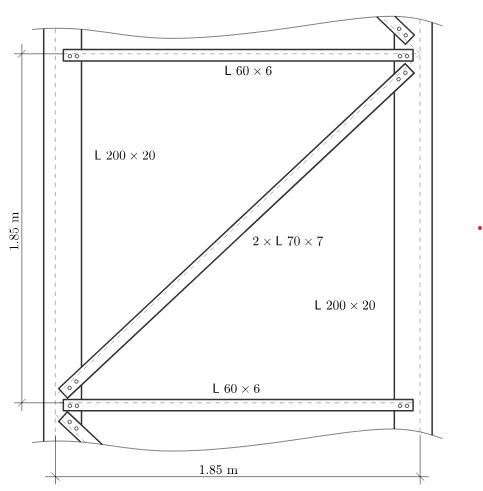

The truss consist of equal leg steel angle profiles. The corners are 200 x 20, the horizontal members are 60 x 6 and the diagonals are two 70 x 7 bolted together on either side of the corner members flange.

The cross-section can be rotated randomly to contain modes of both directions in each sensor signal and also make sure, the equivalent springs do not act in the principal directions of the cross-section.

Wind excitation is based on EN 1994-1-4 with parameters from [Clobes 2008] and the method given by [Solari 2001], [Shinozuka 1972]. Wind direction is fixed to the models coordinate system, as the cross-section can be rotated w.r.t. the wind direction. Basic wind speed $v_b$ (given fixed in EN 1994-1-4) could be considered as random (Weibull, with parameters as estimated from Geyer monitoring data: $c={0.75:[2.267, 2.3],0.25:[1.96, 2.01]}$, $\lambda={0.75:[5.618, 5.649], 0.25:[5.91,6.0]}$, parameters seem to be independent $\rho= {0.03, 0.3}$). 


Other parameters such as integral lengths $L(z)$, correlation lengths $C_{k,j}$ ($k: {u,v,w}, j: {x,y,z}$), spectral bandwidth $f_{s,w}$ might be considered random or fixed.

#### Given parameters (sample Nr. 566)

$E = 2.1e11$ N/m^2                                           Young's Modulus                                       
$\rho = 7850$ kg/m^3                                         Mass density                                          
$A = 0.034251 $ m                                            equivalent cross-section area (average per meter)
$I_y = 0.013353 $ m                                          second moment of area (equivalent of a truss. 80 %)                             
$I_z = 0.013716 $ m                                          second moment of area (equivalent of a truss. 80 %)                             
$m_\text{add} = 58.477412$ kg/m                              Additional Mass (Platforms, Cables, Antennas, etc.)   
$N_\text{cbl} = 67978.166088$                                Pretension of guy cables  (Normal distr.)             
$A_\text{cbl} = 0.000785$                                    Cross-Sectional Area of cables                        
$\zeta_\mathrm{glob} = 0.008117$                             Glob. damp.: low / med. vibr.                         
$d_\text{D} = 284.903024$                                    TMD viscosity due to temperature-dependent silicon-oil
$m_\text{D} = 800$                                           TMD mass                                              
$k_{\mathrm{D}} = 1025.48$                                   TMD stiffness                                         
$n_\text{nodes} = 600$                                       Number of nodes, incl. internal nodes                 
$n_m = 14$                                                   Number of modes considered

#### Problems to be decided:

- FRF-based solution (investigate numerical cost, would mean to neglect higher order modes -> not realistic)

- Mode shapes should be scaled to unity at the mast tip

#### Case studies with respect to closely-spaced modes (variable $b$) and global damping (variable $\zeta$)

1. $b=0.85$, $\zeta = 0.002$ (reference)
2. $b=0.85$, $\zeta = 0.0005$ (light damping)
3. $b=0.85$, $\zeta = 0.005$ (heavy damping)
4. $b=0.89xx$, $\zeta = 0.002$ (closely-spaced modes)

#### Parameters to be set based on assumptions in subsequent steps:
- Solution time-step: Should be much smaller than for any desired sampling rate, will be increased in signal acquisition step -> based on highest sampling rate
- Solution max length: Will be shortened in signal acqusition step -> based on max measurement duration
- Solution No. channels: Will be reduced in signal acquisition step -> 50 (?)

#### Outputs
- numerical modal parameters (for control)
- numerical mode shapes (for control)
- 

## 2. Sensors / Signal Acquisition

Scenario: Multiple experts have been asked, how they would choose the parameters / what they believe are the ranges of the parameters:

#### Placement of Sensors
- $n_\mathrm{sen} = $ Number of sensors max. 12 channels
- $\operatorname{loc}_\mathrm{sen} = 0.2:[\mathrm{lumped}];0.8:[\mathrm{distributed}]$ Placement of sensors (evenly distributed, every five meters, distance between sensors min. 20 meters; both directions simultaneously!)

#### Type of Sensors
- $q_\mathrm{sen} = 0.8[\mathrm{a}];0.2[\mathrm{v}]$ Measurement quantity (acceleration, velocity)
- $\operatorname{SNR}_\mathrm{sen} = $ Sensor noise variance (pre-sampling, white noise)<br>
**TODO: The datasheets of different sensors should be examined, to obtain reasonable values for these parameters. PCB 393A01, PCB 393B31, Gyralp GMC 40, Lennarts**

#### Signal acqusition system
- Broadband Resolution
    - $q = $ Quantization range. <br>
    **TODO: Usually set on the basis of preliminary measurements. Provide an example signal to given knowledge, and then range x 2 ... 10 and round to a voltage level**
    - $b = [0.05:12, 0.5:16, 0.3:24, 0.05:32]$ Number of quantization bits (**TODO: allow discrete ranges? e.g. 16 ... 32)**
- Aliasing Filter (FIR: Windowed Sinc)
    - $f_c = $ Filter 3 dB cutoff frequency 2...2.5
    - $w_\mathrm{type}[m]$ Window type  **TODO: Which window types to include (rectangular, hanning, hamming, etc.)?**
    - $M = $ Window length
- $f_s = $ Sample rate $f_s = \frac{1}{\Delta t}$
- $N = $ Number of Timesteps / Measurement Duration $T = N \Delta t$
- $\operatorname{SNR}_\mathrm{acq} = $ Acquisition system noise variance (post-sampling, white noise) <br>
  **TODO: Where to get reasonable values? from Datasheets**
- **TODO: model the built-in highpass filter**

#### Outputs
- Total SNR
- Effective quantization bits [Channel average] (Considering range, bits and actual vibration level)
- **TODO: Estimated SNR**

## 3. Signal processing / System identification

#### Signal processing (Consider two analyses in different frequency bands)
- Filter and Decimation (IIR Filter)
    - $M = $ Number of IIR filter coefficients ("order")
    - $f_c =$ Filter 3 dB cutoff frequency
    - $d = $ Decimation rate (every d-th sample)
- $\hat{\Phi}(\omega)$ Spectral estimator (Welch, Blackman-Tukey)
    - Time / Lag Window (If PSDs are involved)  <br>**TODO: Which window types to include (rectangular, hanning, hamming, etc.)?**
    - $ 2 (n_\mathrm{lags} - 1) = n_\mathrm{lines}$ Number of time lags ↔ number of frequency lines ($\tau_\mathrm{max} = n_\mathrm{lags} \Delta t$ Correlation length ↔ Frequency Resolution $\Delta f = \frac{f_s}{n_\mathrm{lines}}$)
- use non-reference based OMA ($n_\mathrm{ref}$ Number and $\operatorname{loc}_\mathrm{ref}$ location of reference channels) 

#### Systemidentification
- $n_\mathrm{ord}^\mathrm{max} = $ max model order
- Identification Algorithm (SSI-cov, SSI-data, pLSCF) -> Three case studies, pLSCF might need some work in terms of verification, efficiency, etc.

#### Outputs
- PSD Energy
- **TODO: Cross-validated reconstruction error of the identified system**

## 4. Modal Analysis

#### Parameters 
- $n_\mathrm{ord} = $ Model order -> Clustern!
- $f_\mathrm{max} = $ largest natural frequency of interest

#### Outputs: 
- Store identified modal in the database regardless of assignment to physical modes
- Modal Frequencies
- Modal Damping
- Complex mode shapes at all DOFs (linear interpolation for UQ Processing)
- MPC, (Modal Contributions)
- Selected model order
- Number of modes


# B. Uncertainty Propagation

- Two steps: 
    1. Generate detailed (space and time) structural responses (mostly deterministic, only aleatory uncertainties in the response signals)
    2. Apply Signal Acqusition, Processsing, SysID and Modal onto this data (epistemic and aleatory)
- $N_\mathrm{MCS, ale} = $ Number of samples for aleatory uncertainties (sufficient statistical confidence)
- $N_\mathrm{MCS, epi} = $ Number of samples for epistemic uncertainties (sufficiently small cross-validation error in RBF interpolation)

# C. Uncertainty Processing

**Which outputs do we want to process?**
- Modal Frequencies and Modal damping -> **TODO: Classification / Clustering/ Assignment necessary**
- Mode shapes? -> Would have to be done individually for each DOF, with linear interpolation for unmeasured DOFs

**Which intermediate outputs do we need in the UQ Database? (Others are still stored with the samples)**
- Numerical modal parameters 
- Spectra
- Modal Contributions, MPC, MPD, 
- Signal-to-Noise-Ratio, Effective quantization bits,

**How can we include the existing OMA UQ Methods (aleatory only) in this methodology (in principle it is possible):** 
- Technical details:
    - SSI would take the place of a statistical estimator
    - We would need to **incorporate weights into the routines**
    - The imprecision processing would not be possible, because the modal parameters are not yet available
    - Pre-generation of modal parameters for each imprecision sample not possible due to unknown weights (incompleteness)
    - We have to **combine imprecision and incompleteness processing**
        1. **direct optimization (not feasible):**
            - for each optimizer step: 
                - for each aleatory sample:
                    - compute weights, 
                    - find nearestND impprecision sample (and compute / retrieve correlation function)
                - run modal analysis algorithm
                - select mode of interest, discard other modes -> **useless, too much overhead**
        2. **sample incompleteness along epistemic direction**
            - for each epistemic sample: <br>
                A given aleatory sample may be the bound of any imprecision hypercube. A given imprecision sample thus may be in any of these imprecision hypercubes, in particular after interpolation. So it may have different weights for each imprecision hypercube.
                - for each imprecision hypercube: **(what if the epistemic sample is not in the hypercube?)**
                    - for each aleatory sample:
                        - generate weights
                        - compute / retrieve correlation function
                    - run modal analysis and clustering
                    - store all modes
            - **cluster / classify modes (fuzzy membership?)**
            - select quantity and mode of interest
            - fit an RBF interpolator
            - interval optimization within all imp+inc hypercubes
            - (validate found interval bounds)
            - Procedure:
                1. run DataManager on aleatory samples to generate signals
                2. run DataManager on epistemic samples to identify modes
                    would access all aleatory samples, weights must be provided by freezing inc variable for each epistemic sample and run self.probabilities_imp()
- Fuzzy clustering, etc.

**Do we have to consider anything else regarding further steps (Uncertainty reduction, ANN training, applicability to real measurements, etc.) such that data can be "re-cyled"?**
- Uncertainty reduction and ANN training would include uncertainties of the first step as well
- real measurements would be plugged in instead of generated signals

# Structural Model generation


In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%load_ext snakeviz
# dont forget to forward ports: ssh -L 8080:127.0.0.1:8080 sima9999@makalu47.rz.tu-ilmenau.de

import sys
import os
sys.path.append("/usr/wrk/people9/sima9999/code/")
sys.path.append("/vegas/users/staff/womo1998/Projects/2019_OMA_UQ/code/")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from model.mechanical import Mechanical, MechanicalDummy
from model.turbulent_wind import *

# from uncertainty.polymorphic_uncertainty import PolyUQ
# from uncertainty.data_manager import DataManager

%aimport -sys -logging -matplotlib -matplotlib.pyplot -numpy -pandas - scipy.stats -scipy.stats.qmc

In [2]:
add_mass = 58.477412
zeta = 0.008117
dD = 284.903024
mD = 800
kD = 1025.48
num_nodes = 201
num_modes = 14

E = 2.1e11

A = 0.034251
Iy = 0.013353
Iz = 0.013716
Iyz = 0

A_wire = 0.000785
rho = 7850
N_wire = 67978.166088

meas_locs=None#x_grid
alpha = 45

# approximately similar second moments of area are achieved with a truss 
# consisting of 4 L profiles in the corners
# additionally, the diagonal and horizontal bracings have to be considered for the weight
# they add a weight of 0.016005*rho per meter, 
# so we need a cross-section area of 0.034634 m² to achieve the same weight per meter
# use a 200x200x20 L Profile at a 1.85 m distance slightly lower area, but similar moments of area
# (also see photos of Sender Aholming)
# use only the parts due to Steiner's theorem and reduce to 80 % due to truss flexibility
# A_L = (2*a*t - t*t)*4 = 0.0304
# Iy_L = 0.8*A_L*(L/2)**2 = 0.020809
# Iz_L = 0.8*A_L*(L/2)**2 = 0.020809
# also see excel workbook 'pipe_to_truss_conversion.xlsx'

# rotate cross section about angle alpha
alpha = alpha * 2 * np.pi / 360
rIy = 0.5 * (Iy + Iz) + 0.5 * (Iy - Iz) * np.cos(2 * alpha) + Iyz * np.sin(2 * alpha)
rIz = 0.5 * (Iy + Iz) - 0.5 * (Iy - Iz) * np.cos(2 * alpha) - Iyz * np.sin(2 * alpha)
rIyz = -0.5 * (Iy - Iz) * np.sin(2 * alpha) + Iyz * np.cos(2 * alpha)

Aeq = A_wire/(1 + (A_wire*rho*9.819*70/N_wire)**2*E*A_wire/12/N_wire)

keq = (E * Aeq * (70**2 / (70**2 + 160**2)) + N_wire)/np.sqrt(70**2 + 160**2)

rho_pipe = rho + add_mass / A

struct_parms = {
        'L'         : 200,

        'E'         : E,
        'A'         : A,
        'rho'       : rho_pipe,
        'Iy'        : rIy,
        'Iz'        : rIz,
        'Iyz'       : rIyz,

        'kz_nl'     : 1.7 * keq,
        'ky_nl'     : 2 * keq,
        'x_knl'     : 160,

        'm_tmd'     : 800,
        'ky_tmd'    : 1025.48,
        'kz_tmd'    : 1025.48,
        'dy_tmd'    : dD,
        'dz_tmd'    : dD,
        'x_tmd'     : 200,
        }


working_dir='/dev/shm/womo1998/'
global ansys
if 'ansys' not in globals():
    ansys = Mechanical.start_ansys(working_dir=working_dir)
mech = Mechanical(ansys=ansys, wdir=working_dir)

mech.build_conti(struct_parms, Ldiv=num_nodes, damping=zeta, 
                 num_modes=num_modes, meas_locs=meas_locs)
# display(mech.nodes_coordinates)
# display(ansys.parameters)
mech.modal()
pass
# display(mech.damped_frequencies)
# display(mech.modal_damping)
# display(mech.num_nodes) # Forces must be extended for NKNL2=201 and NKTMD2=202 and an all zero row for the node at x=0
# x_grid:[  1,   2,  ... , 200]) in meter
# nodes_coordinates: 
# array([[  1.,   0.,   0.,   0.],
#        [  2.,   1.,   0.,   0.],
#        ....
#        [200., 199.,   0.,   0.],
#        [201., 200.,   0.,   0.],
#        [202., 160.,   0.,   0.],
#        [203., 200.,   0.,   0.]])

INFO:model.mechanical:Switching working directory:	 /dev/shm/womo1998/
INFO:model.mechanical:Current job:	 file


# Windfield generation

In [50]:
# 200 x 2**17 samples take 1min 42 (CPSD assembly) + 2min 20s (CPSD decomposition) + 1min 59s(Fourier coefficients assembly) + 1.4s (IFFT) = 6min 2s; 
# peak at 270 GB RAM

# Spatial domain grid
x_grid = np.arange(1,201,1)
x_grid = mech.nodes_coordinates[0:-2,1]

# Frequency domain grid

# wind does not have to be generated up to higher frequencies, 
# as the energy in these bands is negligible
fs_w = 10 # Hz, Wind sample rate
# sample rate is adjusted by zero padding the fft
fs_m = 100 # Hz, Model sample rate

duration = 100 # seconds

if duration is None:
    N = 2**17
    duration = N / fs_w
else:
    N = int(duration * fs_w)

N_m =  int(duration * fs_m)


f_w = np.fft.rfftfreq(N, 1/fs_w)[np.newaxis,:]

# Geländekategorie I - IV
category=3
z_min = [None,2,4,8,16][category]
z_0 = [None, 0.01,0.05,0.3,1.05][category] # Rauigkeitslänge
alpha = [None,0.12,0.16,0.22, 0.3][category]  # Profilexponent

# Windzone 1 - 4
# zone = 2
# v_b = [None, 22.5, 25.0, 27.5, 30][zone] # m/s Basiswindgeschwindigkeit (v_b = v_b0 in DE vgl. NA S. 5)
v_b = scipy.stats.weibull_min.rvs(2.28,scale=5.64, size=1)

# Compute basic wind parameters according to DIN EN 1994-1-4 and corresponding NA    
# Werte nach Tab. NA.B.2
vm_fact = [None, 1.18, 1.00, 0.77, 0.56][category]
v_m = vm_fact * v_b * (x_grid/10)**alpha
vm_min = [None, 0.97, 0.86, 0.73, 0.64][category]
v_m[x_grid<=z_min] = vm_min * v_b

# v_m = 1*v_b*(x_grid/10)**0.16 # mittlere Windgeschwindigkeit (obere Formel ergaebe Faktor 1.0066803, daher die geringen Abweichungen)
Iv_fact = [None, 0.14,0.19,0.28,0.43][category]
I_v = Iv_fact*(x_grid/10)**(-alpha) # Turbulenzintensität [% der mittleren Windgeschwindigkeit] (? siehe unten)
Iv_min = [None, 0.17, 0.22, 0.29, 0.37][category]
I_v[x_grid<=z_min] = Iv_min

sigma_v = I_v * v_m # Standardabweichung der Turbulenz nach Gl. 4.7

eps = [None, 0.13, 0.26, 0.37, 0.46][category] # Exponent \epsilon nach Tabelle NA.C.1
L = (x_grid/300)**eps * 300 # Integrallängenmaß nach Gl. NA.C.2
L[x_grid<=z_min] = (z_min/300)**eps * 300

c_uj, c_vj = spectral_wind_field(x_grid, f_w, 
                                 L, v_m, sigma_v, C_uz=10, C_vz=7, C_wz=4, 
                                 seed=None)

u_j, v_j = temporal_wind_field(c_uj, c_vj, N_m)

INFO:model.turbulent_wind:A windfield of 201 x 501 samples will be sampled at 10.0 Hz (duration 100.0 s).
INFO:model.turbulent_wind:Random seed is: 1860335472
Transforming windfield to time domain with 201 x 10000 samples.


In [108]:
# with mean wind
# F_uj, F_vj = force_wind_field(u_j + v_m[:,np.newaxis], v_j, delta_x=x_grid[1]-x_grid[0], 
#                               b=1.85, cscd=1.0, cf=2.36124, rho=1.25)
# without mean wind
F_uj, F_vj = force_wind_field(u_j, v_j, delta_x=x_grid[1]-x_grid[0], 
                              b=1.85, cscd=1.0, cf=2.36124, rho=1.25)

Computing forces from windfield with A_ref=1.85 and c_f = 2.36124


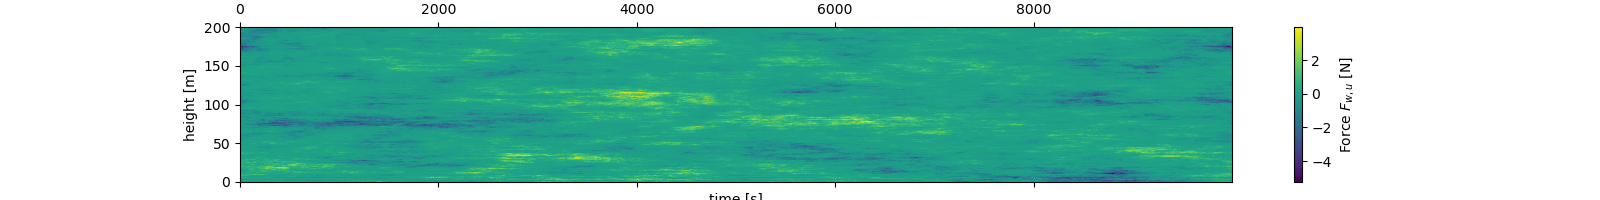

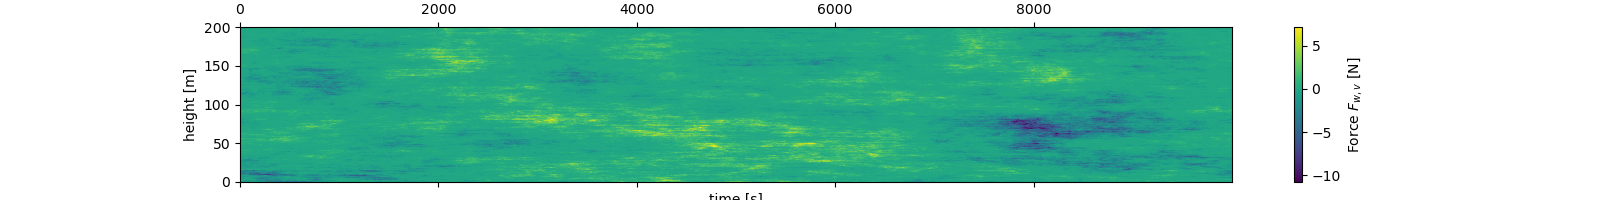

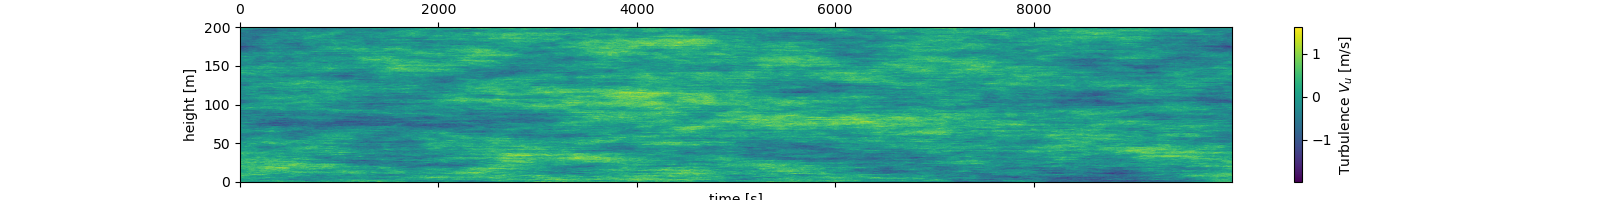

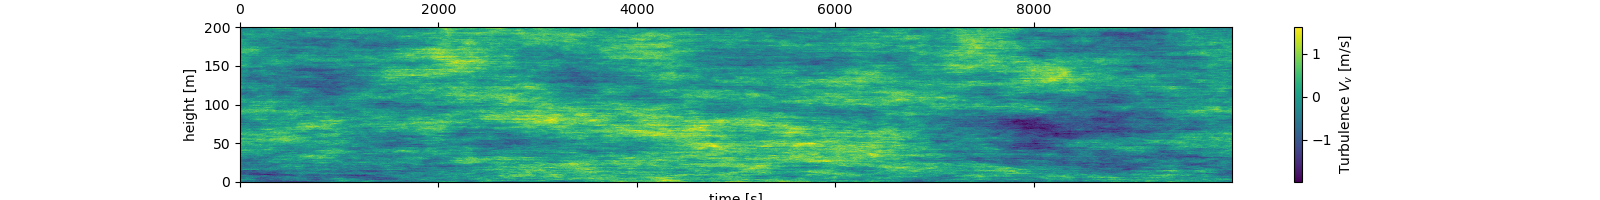

In [109]:
plt.close('all')
plot_windfield(u_j, v_j, F_uj, duration=duration)
plot_windfield(F_vj=F_vj, duration=duration)

## Transient solution

In [125]:
zeros = np.zeros((1,N_m))
this_N =N_m # min(1000, N_m)#
t, [d,v,a] = mech.transient(fy=np.vstack((F_uj, zeros, zeros))[:,:this_N].T, fz=np.vstack((F_vj, zeros, zeros))[:,:this_N].T, deltat=1/fs_m, timesteps=this_N)

INFO:model.mechanical:Signal parameters for upcoming transient: deltat 0.010000, dt_fact for f_max 0.032021, timesteps 10000, num_cycles for f_min 16
INFO:model.mechanical:10000 of 10000 timesteps in 141.967 s (Remaining ~141.967 s; Disk free: 251.69 GB)


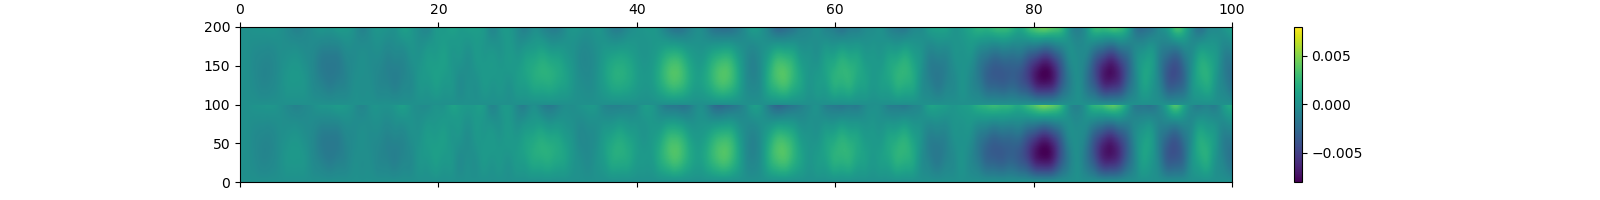

In [127]:
plt.matshow(np.vstack((d[:,:,1].T, d[:,:,2].T)), origin='lower', aspect='auto', extent=(0, duration*this_N/N_m, x_grid[0], x_grid[-1]),)
plt.colorbar()

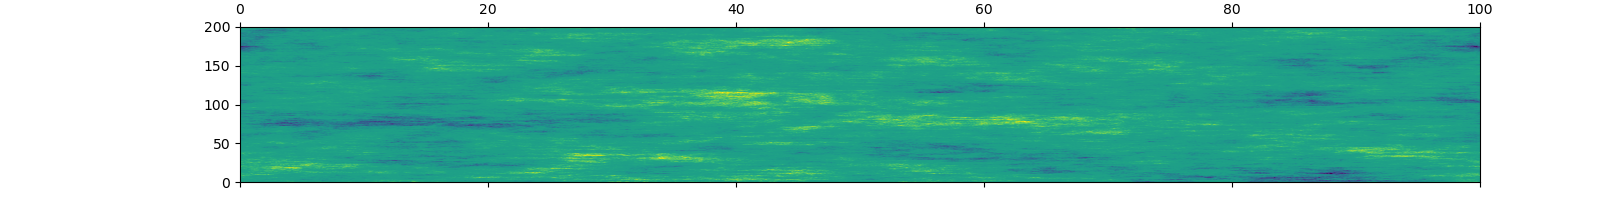

In [120]:
plt.matshow(F_uj[:,:this_N], origin='lower', aspect='auto', extent=(0, duration*this_N/N_m, x_grid[0], x_grid[-1]),)
ani=None

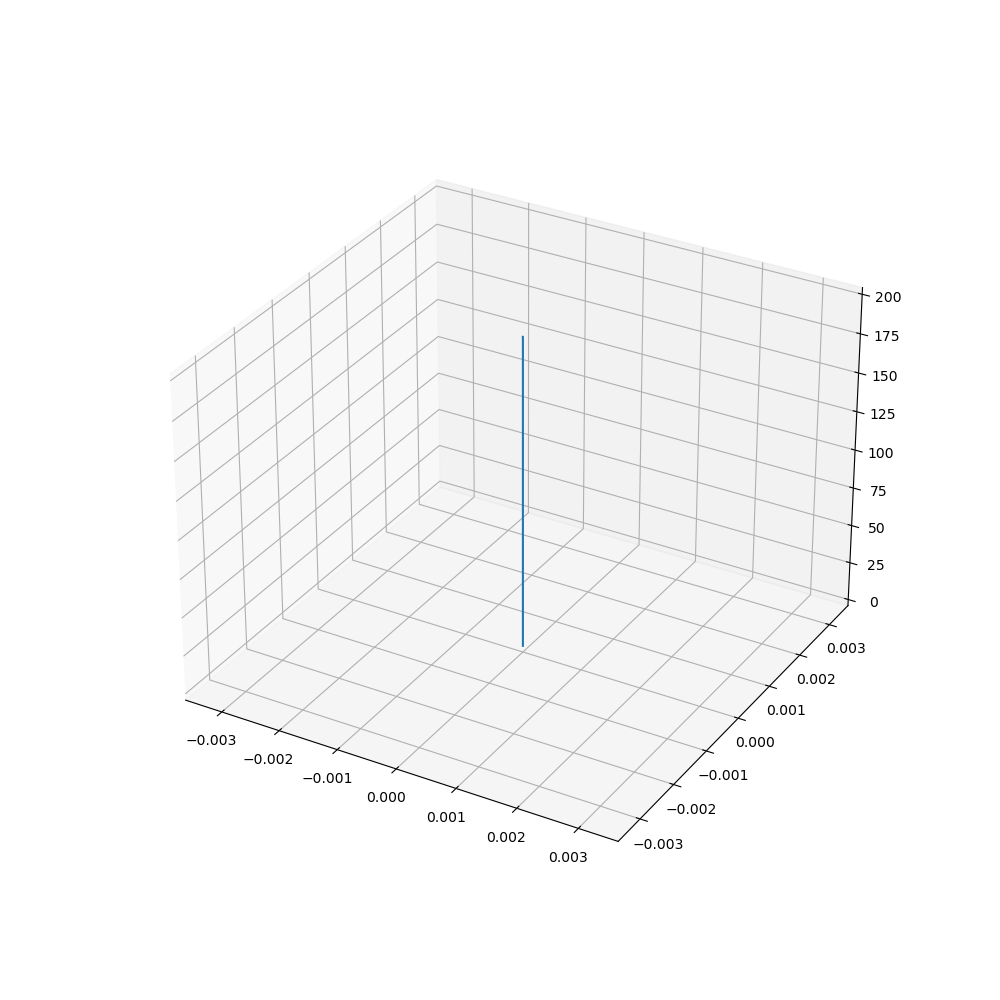

In [27]:

from matplotlib.animation import FuncAnimation
plt.close('all')
del ani

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
z = x_grid
zero = np.zeros_like(z)
# to run GUI event loop

ind = np.ones(mech.nodes_coordinates.shape[:1], dtype=bool)
ind[-2] = False
lines = ax.plot(d[0,ind,1].T, d[0,ind,2].T, mech.nodes_coordinates[ind,1])[0]

lim = np.max([-np.min(d[:,:,1]), np.max(d[:,:,1]), -np.min(d[:,:,2]), np.max(d[:,:,2])])*20
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))

def update(n):
    lines.set_data(d[n,ind,1].T, d[n,ind,2].T)
    lines.set_3d_properties(mech.nodes_coordinates[ind,1])
    return lines

ani = FuncAnimation(fig, update, frames=N_m, blit=True, interval=33, repeat=False)
plt.show()   

In [24]:
plt.close('all')
del ani


In [25]:
ani = None

In [58]:
plt.show()

## FRF Solution

In [110]:
fF_uj = np.fft.rfft(F_uj)
fF_vj = np.fft.rfft(F_vj)

In [122]:
%%time
frfs = []
for inp_dof in ['Fy', 'Fz']:
    frf = np.zeros((N_m // 2 + 1, 2*len(mech.nodes_coordinates), len(x_grid)), dtype=complex)
    for i in range(len(x_grid)):
        inp_node = mech.nodes_coordinates[i,0]
        omegas, frf_i, dof_red = mech.frequency_response_non_classical(N_m, inp_node=inp_node, inp_dof=inp_dof, 
                                             use_meas_nodes=True, out_dofs=['uy','uz'], 
                                             fmax=fs_m/2, out_quant='d', modes=None)
        frf[:,:,i] = frf_i
    frfs.append(frf)

INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model.mechanical:FRF computation for non-classical modes (non-proportional damping).
INFO:model

In [123]:
# zeros = np.zeros((1,N_m))
# frf.shape = (N_m//2+1, 2*len(meas_nodes), len(x_grid))
# F_uj.shape = (len(x_grid), N_m//2+1)
outy = np.sum(frfs[0] * fF_uj.T[:,np.newaxis,:], axis=2) 
outz = np.sum(frfs[1] * fF_vj.T[:,np.newaxis,:], axis=2)

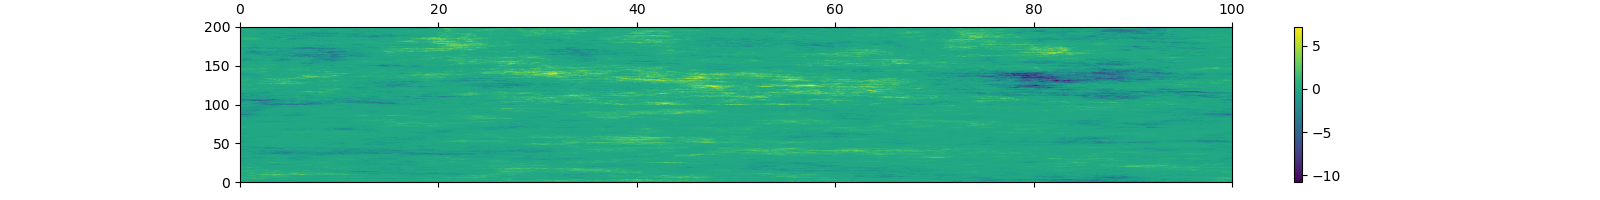

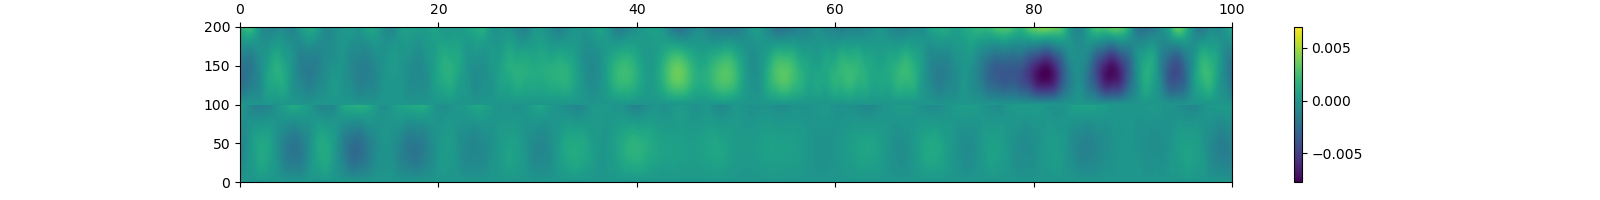

In [124]:
plt.close('all')
# plt.matshow(np.abs(out.T), norm='log')
plt.matshow(np.vstack((F_uj, F_vj)), origin='lower', aspect='auto', extent=(0, duration*this_N/N_m, x_grid[0], x_grid[-1]),)
plt.colorbar()
plt.matshow(np.fft.irfft(outz+outy, axis=0).T, origin='lower', aspect='auto', extent=(0, duration*this_N/N_m, x_grid[0], x_grid[-1]),)
plt.colorbar()

/tmp/ipykernel_1672/1009844939.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(np.abs(frfs[1][:,:,inp_node].T))


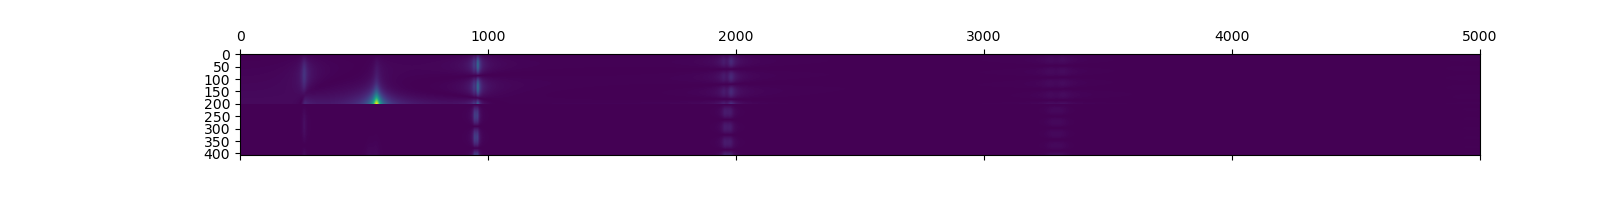

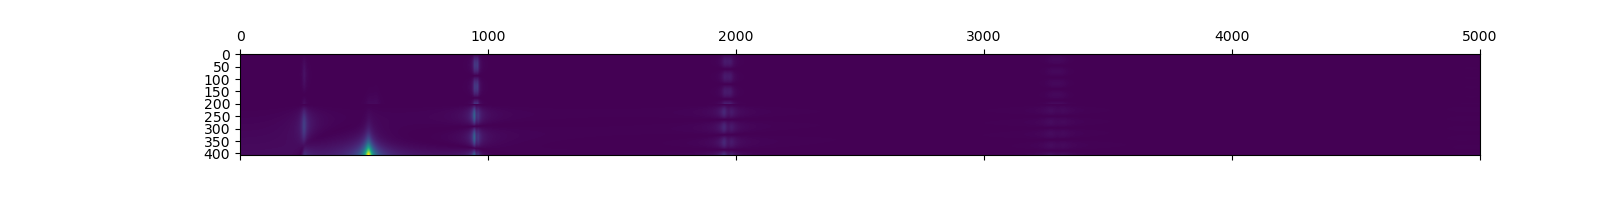

In [98]:
inp_node=160
plt.close('all')
plt.matshow(np.abs(frfs[0][:,:,inp_node].T))
plt.matshow(np.abs(frfs[1][:,:,inp_node].T))